In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv",sep=',')
fashion_test_df = pd.read_csv("fashion-mnist_test.csv",sep =',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df, dtype= 'float32')

In [13]:
testing = np.array(fashion_test_df, dtype = 'float32')

In [12]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
type(training)

numpy.ndarray

8.0

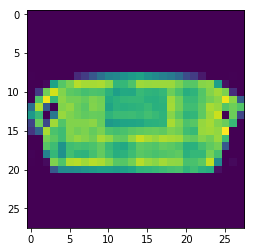

In [28]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

Labels

Each training and test example is assigned to one of the following labels:
Label 	Description
0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot

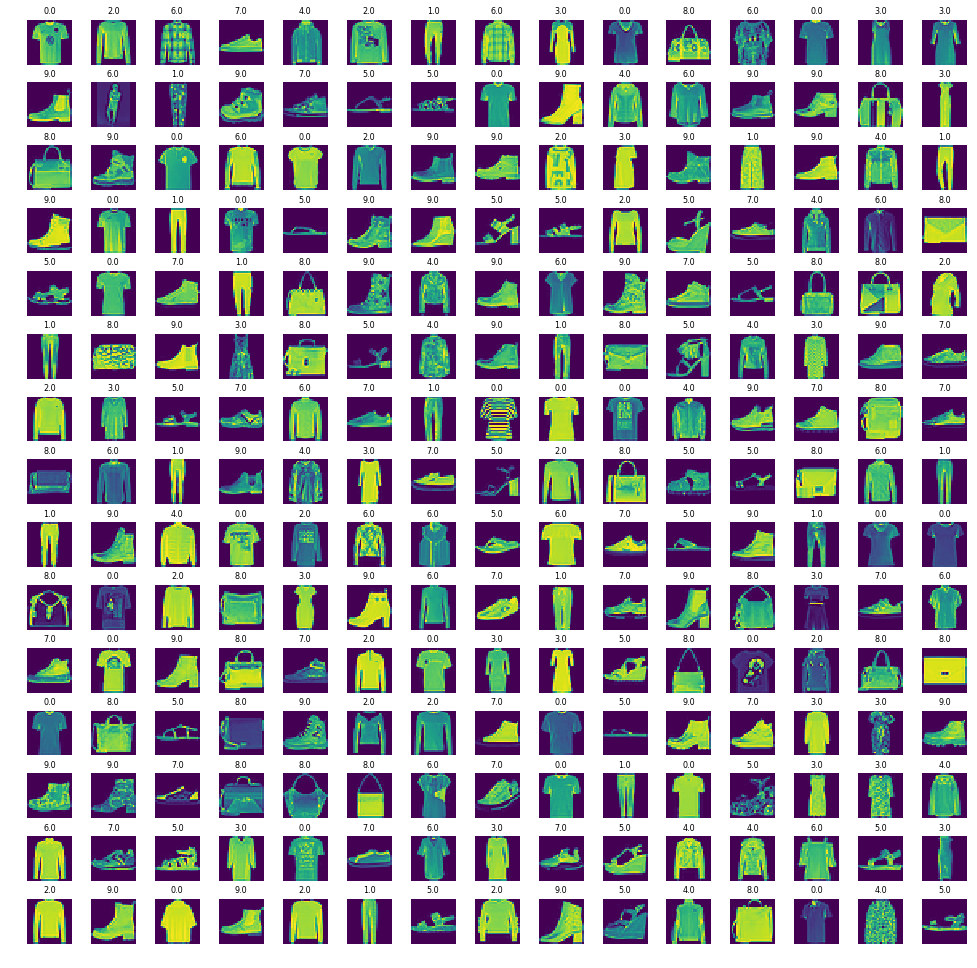

In [31]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel()  #flatten the 15x15 matrix into 225 array

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    #read and display image with selected index
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [32]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[: ,0]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [37]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [38]:
X_train.shape

(48000, 28, 28, 1)

In [39]:
import keras

Using TensorFlow backend.


In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [43]:
cnn_model = Sequential()

In [44]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [45]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [46]:
cnn_model.add(Flatten())

In [47]:
cnn_model.add(Dense(output_dim = 32, activation = "relu"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [48]:
cnn_model.add(Dense(output_dim = 10, activation = "sigmoid"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [53]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics= ['accuracy'])

In [54]:
epochs_val = 50

In [55]:
cnn_model.fit(x=X_train,
    y=y_train,
    batch_size=512,
    epochs=epochs_val,
    verbose=1,
    validation_data= (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 10s 200us/step - loss: 0.9385 - accuracy: 0.6783 - val_loss: 0.5015 - val_accuracy: 0.8228
Epoch 2/50
48000/48000 [==============================] - 12s 241us/step - loss: 0.4676 - accuracy: 0.8373 - val_loss: 0.4481 - val_accuracy: 0.8413
Epoch 3/50
48000/48000 [==============================] - 11s 225us/step - loss: 0.4103 - accuracy: 0.8570 - val_loss: 0.3926 - val_accuracy: 0.8631
Epoch 4/50
48000/48000 [==============================] - 13s 266us/step - loss: 0.3758 - accuracy: 0.8684 - val_loss: 0.3598 - val_accuracy: 0.8781
Epoch 5/50
48000/48000 [==============================] - 14s 284us/step - loss: 0.3532 - accuracy: 0.8781 - val_loss: 0.3567 - val_accuracy: 0.8752
Epoch 6/50
48000/48000 [==============================] - 13s 269us/step - loss: 0.3334 - accuracy: 0.8843 - val_loss: 0.3344 - val_accuracy: 0.8852
Epoch 7/50
48000/48000 [==============================] 

In [57]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 72us/step
Test Accuracy : 0.905


In [58]:
predicted_classes = cnn_model.predict_classes(X_test)

In [59]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

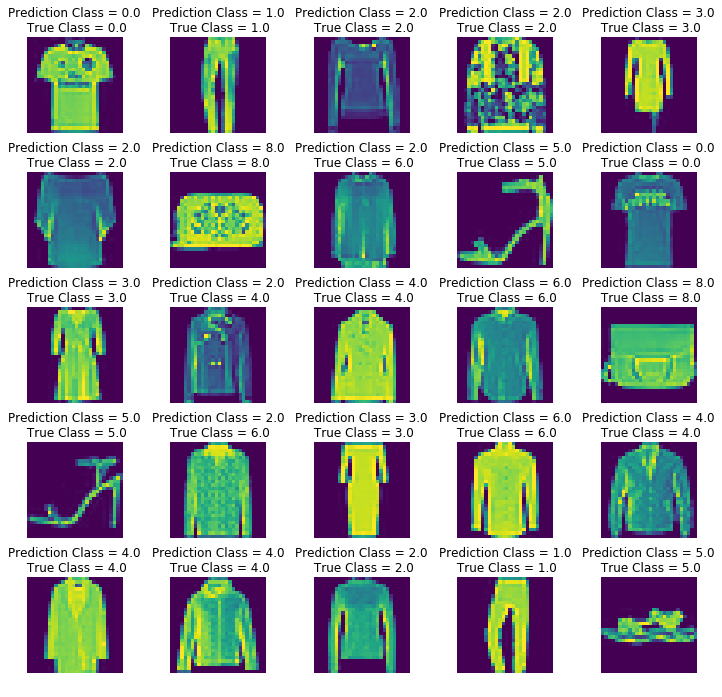

In [61]:
L = 5 
W = 5

fig, axes = plt.subplots(L, W, figsize=(12, 12))

axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.01f}\n True Class = {:0.01f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

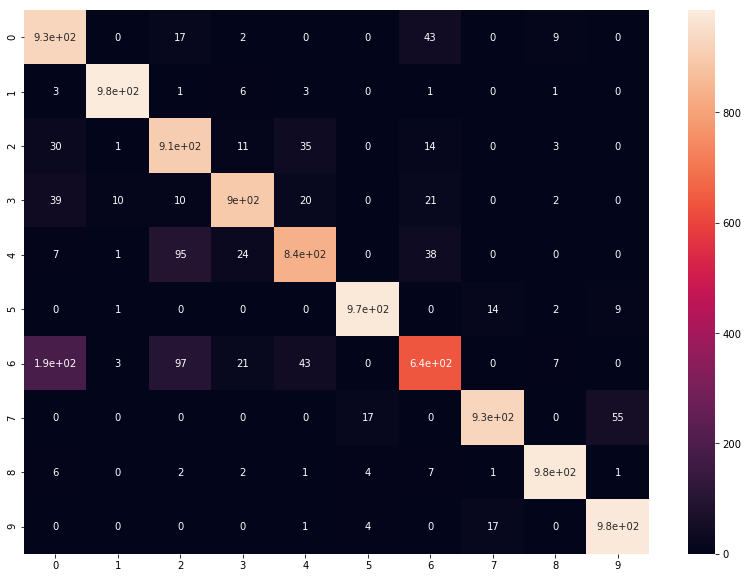

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot= True)

In [64]:
from sklearn.metrics import classification_report

In [65]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.93      0.84      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.80      0.91      0.85      1000
     Class 3       0.93      0.90      0.91      1000
     Class 4       0.89      0.83      0.86      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.84      0.64      0.72      1000
     Class 7       0.97      0.93      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.94      0.98      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

